# Text Statistical Analysis

In [4]:
import pandas as pd
import os
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from collections import Counter
from nltk.corpus import stopwords
import  matplotlib.pyplot as plt

In [2]:
os.chdir('/Users/yang-/PycharmProjects/hw/Fintech/pj')
transcript = pd.read_csv('transcripts.csv', index_col=0)
transcript = transcript.iloc[:, 1]

In [5]:
# sentence tokenize
transcript = transcript.apply(lambda x: sent_tokenize(x.lower()))
# eliminate 'title:'
transcript = transcript.apply(lambda x: ["".join(sentence.split(sep=':', maxsplit=1)[1:]) if ':'in sentence else sentence for sentence in x ])

In [6]:
#frequency analysis
transcript = transcript.apply(lambda x : "".join(x))
str_transcript = "".join(list(transcript))
tokens = [w for w in word_tokenize(str_transcript)if w.isalpha()]
no_stops = [t for t in tokens if t not in stopwords.words('english')]
count = Counter(no_stops).most_common()

Text(0.5, 1.0, 'Top 30 tokens in Transcript & Expected Frequency for Zipf Curve')

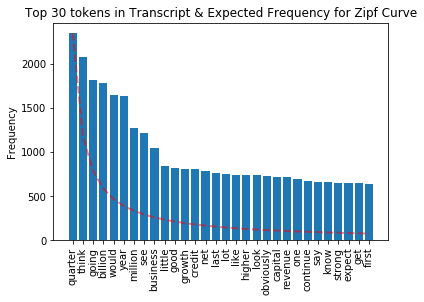

In [11]:
#bar plot & zipf plot
rank = pd.DataFrame(map(lambda x: x[0], count), columns=['word'])
rank['count'] = pd.Series(map(lambda x: x[1], count))
rank['expected_zipf'] = [ rank['count'][0]/(i+1) for i in range(rank.shape[0])]
rank_30 = rank.iloc[0:30]
plt.bar(rank_30['word'], rank_30['count'])
plt.plot(rank_30['word'], rank_30['expected_zipf'], color='r', linestyle='--', linewidth=2,alpha=0.5)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.title('Top 30 tokens in Transcript & Expected Frequency for Zipf Curve')

The actual observations in most cases does not strictly follow Zipf’s distribution, but rather follow a trend of “near-Zipfian” distribution.Even though we can see the plot follows the trend of Zipf’s Law, but it looks like it has more area above the expected Zipf curve in higher ranked words.

### Word Cloud for top 30 tokens in full rank:

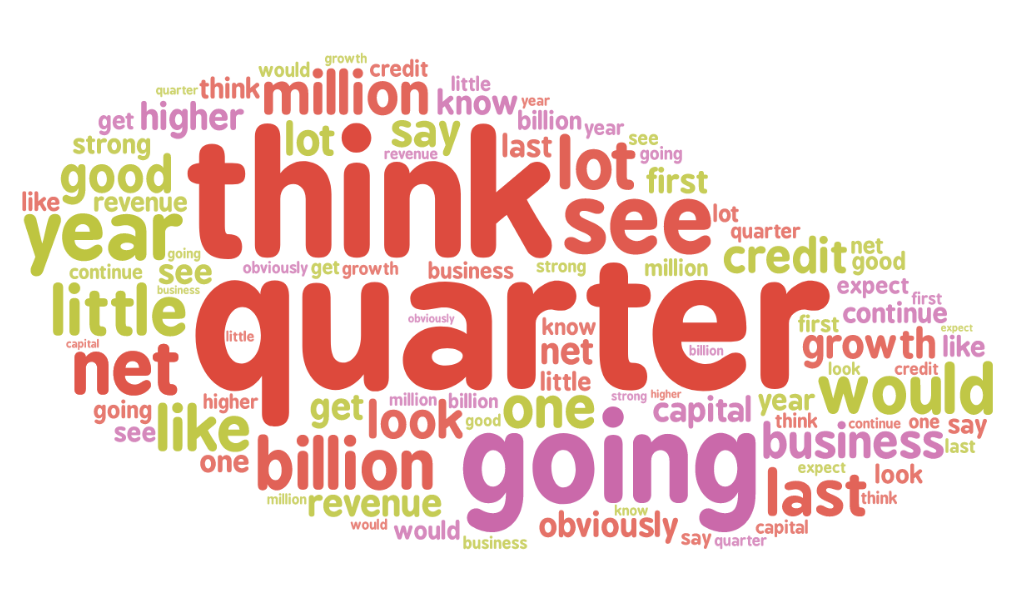

## Analysis based on financial dictionary

In [8]:
positive_dict = pd.read_csv('positive.csv')
positive_dict = positive_dict.iloc[:,0].apply(lambda x : x.lower())
negative_dict = pd.read_csv('negative.csv')
negative_dict = negative_dict.iloc[:,0].apply(lambda x : x.lower())
positive_dict = positive_dict.rename('word')
negative_dict = negative_dict.rename('word')
rank_positive = pd.merge(rank,positive_dict, how = 'inner')
rank_negative = pd.merge(rank,negative_dict, how = 'inner')

Text(0.5, 1.0, 'Top 30 positive tokens in Transcript')

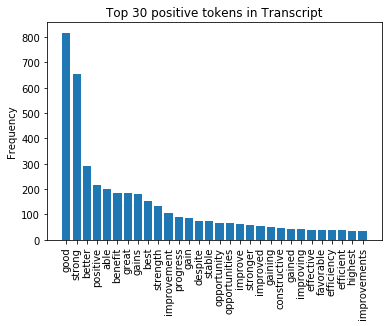

In [9]:
rank_30 = rank_positive.iloc[0:30]
plt.bar(rank_30['word'], rank_30['count'])
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.title('Top 30 positive tokens in Transcript')

### Word Cloud for top 30 positive tokens:

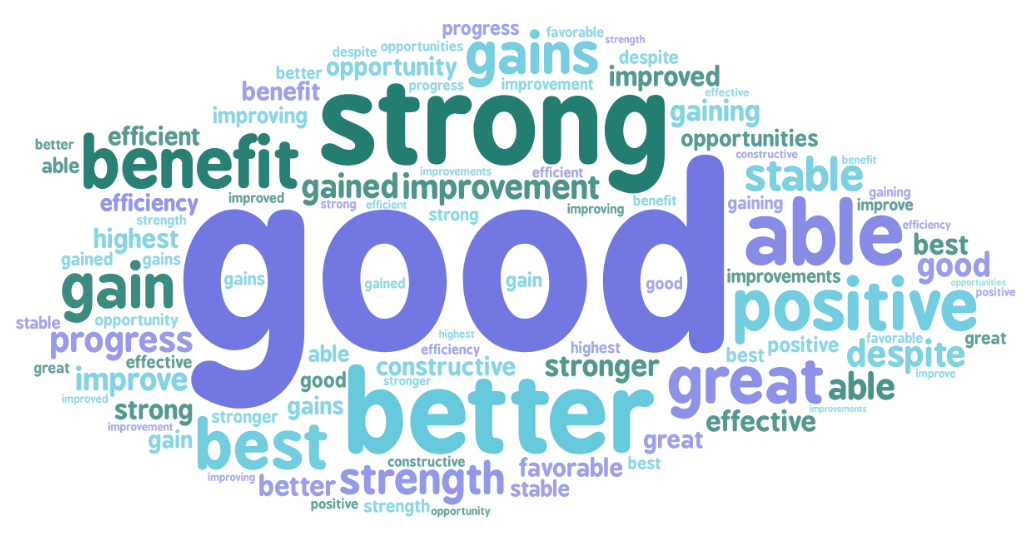

Text(0.5, 1.0, 'Top 30 negative tokens in Transcript')

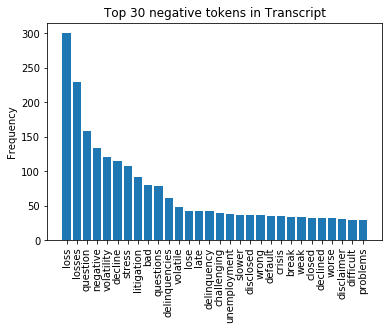

In [10]:
rank_30 = rank_negative.iloc[0:30]
plt.bar(rank_30['word'], rank_30['count'])
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.title('Top 30 negative tokens in Transcript')

### Word Cloud for top 30 negative tokens:

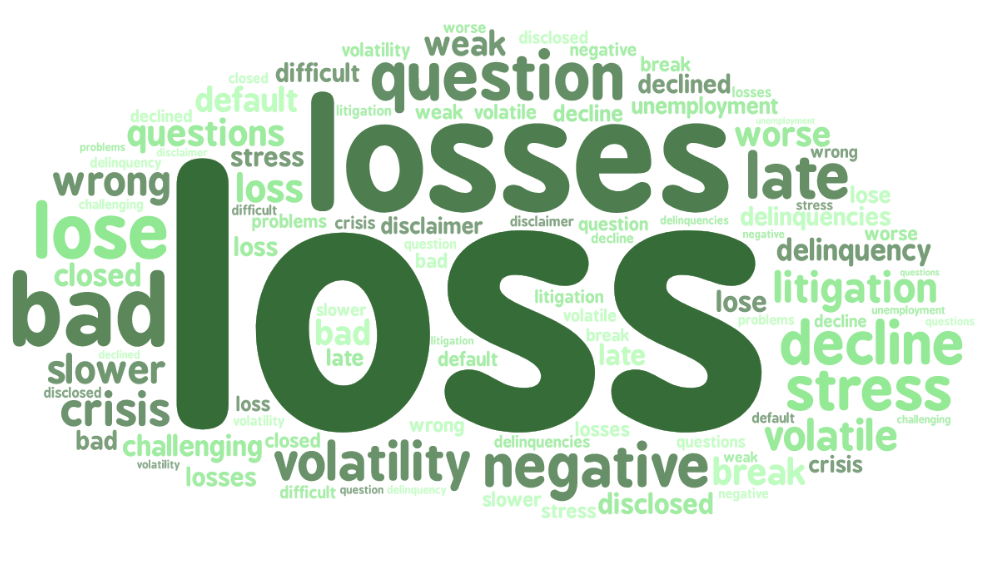

## Word Cloud for Positive and Negative Words:

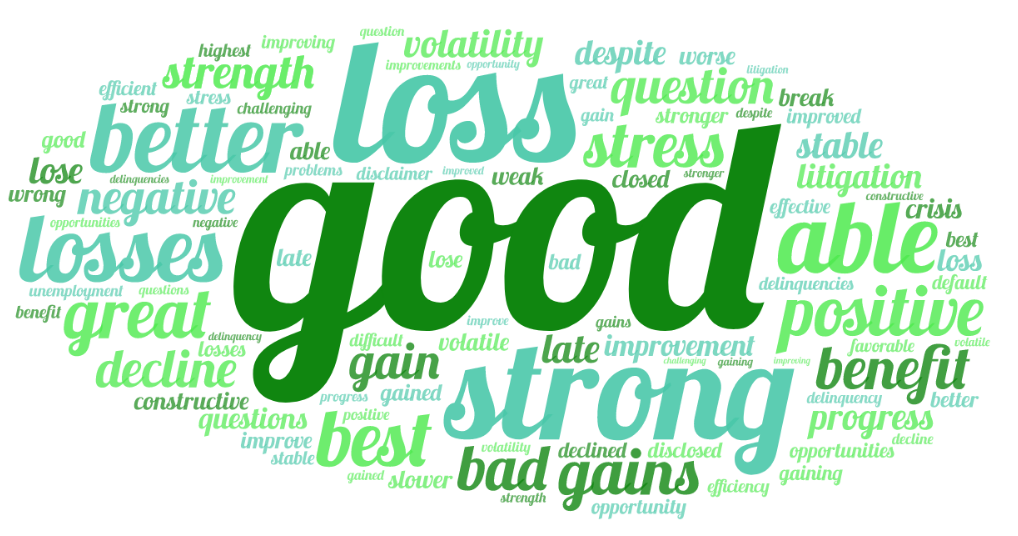